In [89]:
from ultralytics import YOLO
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [101]:
model_path = 'best_part3.pt'
model = YOLO(model_path)
img_path = 'testset1/images/IMG_3960_iter_0.jpg'

In [102]:
results = model(img_path)
# for result in results:
#     result.show(labels=False)

result = results[0]
boxes = result.boxes.xywhn
labels = result.boxes.cls
conf = result.boxes.conf



image 1/1 c:\Users\Cam\OneDrive - VNU-HCMUS\Documents\GitHub\AIC2024-autograde\testset1\images\IMG_3960_iter_0.jpg: 1024x736 27 ticks, 232 not_ticks, 754.7ms
Speed: 45.0ms preprocess, 754.7ms inference, 23.1ms postprocess per image at shape (1, 3, 1024, 736)


In [107]:
centers = np.column_stack((boxes[:, 0], boxes[:, 1]))
sorted_indices = np.argsort(centers[:, 0])

sorted_boxes = result.boxes[sorted_indices].xywhn
sorted_labels = result.boxes[sorted_indices].cls
sorted_conf = result.boxes[sorted_indices].conf

delete_idx = []
for i in range(len(sorted_boxes)-1):
    x1, y1, w, h = sorted_boxes[i]
    x2, y2, w, h = sorted_boxes[i+1]
    if abs(x2 - x1) < 0.01 and abs(y2 - y1) < 0.01:
        delete_idx.append(i+1)

sorted_boxes = np.delete(sorted_boxes, delete_idx, axis=0)
sorted_labels = np.delete(sorted_labels, delete_idx, axis=0)
sorted_conf = np.delete(sorted_conf, delete_idx, axis=0)

print(len(sorted_boxes))

# final_sorted_boxes = []
i = 0
while i < len(sorted_boxes):
    if i%43 == 33:
        step = 10
    else:
        step = 11
        
    cluster_boxes = sorted_boxes[i:i + step]
    cluster_labels = sorted_labels[i:i + step]
    cluster_conf = sorted_conf[i:i + step]

    cluster_sorted_boxes = cluster_boxes[np.argsort(cluster_boxes[:, 1])]
    cluster_sorted_labels = cluster_labels[np.argsort(cluster_boxes[:, 1])]
    cluster_sorted_conf = cluster_conf[np.argsort(cluster_boxes[:, 1])]

    sorted_boxes[i:i + step] = cluster_sorted_boxes
    sorted_labels[i:i + step] = cluster_sorted_labels
    sorted_conf[i:i + step] = cluster_sorted_conf

    i += step


# for i, coor in enumerate(sorted_boxes):
#     print(i, coor)
#     if i%10 == 9: print()
# final_sorted_boxes = np.vstack(final_sorted_boxes)


# sorted_boxes = boxes[np.argsort(boxes[:, 0])]
# sorted_labels = labels[np.argsort(boxes[:, 0])]

# final_sorted_boxes = []
# for i in range(0, len(sorted_boxes), 16):
#     cluster = sorted_boxes[i:i + 16]
#     cluster_sorted = cluster[np.argsort(cluster[:, 0])]
#     final_sorted_boxes.append(cluster_sorted)

# final_sorted_boxes = np.vstack(final_sorted_boxes)




258


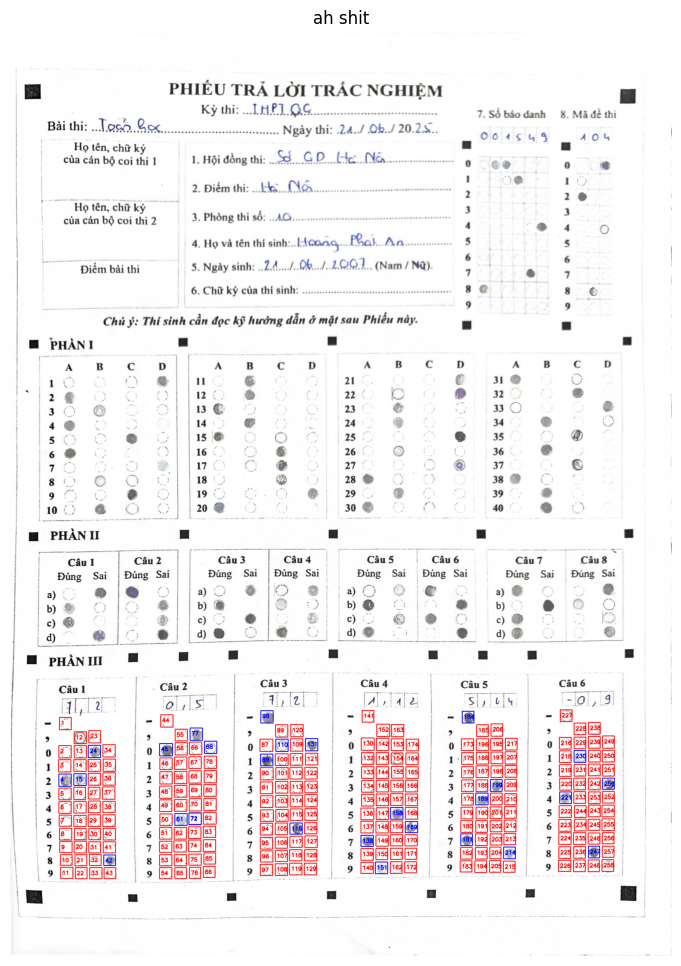

In [104]:
original_image = cv2.imread(img_path)

image_height, image_width = original_image.shape[:2]

image_with_boxes = original_image.copy()

# sorted_boxes = [sorted_boxes[39], sorted_boxes[40]]

for idx, box in enumerate(sorted_boxes):
    x_center = int(box[0] * image_width)
    y_center = int(box[1] * image_height)
    box_width = int(box[2] * image_width)
    box_height = int(box[3] * image_height)
    
    x_min = x_center - box_width // 2
    y_min = y_center - box_height // 2
    x_max = x_center + box_width // 2
    y_max = y_center + box_height // 2
    
    color = [(255, 0, 0), (0, 0, 255)]
    cv2.rectangle(image_with_boxes, (x_min, y_min), (x_max, y_max), color[int(sorted_labels[idx])], 2)
    
    cv2.putText(
        image_with_boxes, 
        str(idx + 1), 
        (x_min + 5, y_min + 25),
        cv2.FONT_HERSHEY_SIMPLEX, 
        0.6,
        color[int(sorted_labels[idx])],
        2
    )

image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("ah shit")
plt.show()

In [105]:
len(sorted_boxes)

259